In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import quant
import numpy as np
import torch
from copy import deepcopy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22})
matplotlib.rc('lines', linewidth=4.0)
matplotlib.rcParams['lines.markersize'] = 13

sns.set_style('whitegrid')
from random import randint 
import glob, os

In [3]:
file_name = glob.glob('/project/kung/xin/fl_saved_model/*.pt')
id_to_file = {}
for name in file_name:
    if 'global' not in name:
        if 'start' in name:
            print('Found start model!')
            round_id = '-1'
            id_to_file['G-'+round_id] = torch.load(name, map_location='cpu')            
        else:
            round_id = name[39:41]
            device_id = name[44:46]
            id_to_file[round_id+'---'+device_id] = torch.load(name, map_location='cpu')
    else:
        round_id = name[39:41]
        id_to_file['G-'+round_id] = torch.load(name, map_location='cpu')
        

Found start model!


In [4]:
def diff_state_dict(old, new, keys):
    diff = {}
    for k in keys:
        diff[k] = new[k] - old[k]
    return diff

In [5]:
print(max([i for i in id_to_file.keys() if 'G' in i]))
print(list(id_to_file['G--1']['net'].keys()))

G-99
['model.0.0.weight', 'model.0.1.running_mean', 'model.0.1.running_var', 'model.0.1.num_batches_tracked', 'model.1.0.weight', 'model.1.1.running_mean', 'model.1.1.running_var', 'model.1.1.num_batches_tracked', 'model.2.0.weight', 'model.2.1.running_mean', 'model.2.1.running_var', 'model.2.1.num_batches_tracked', 'model.3.0.weight', 'model.3.1.running_mean', 'model.3.1.running_var', 'model.3.1.num_batches_tracked', 'model.4.0.weight', 'model.4.1.running_mean', 'model.4.1.running_var', 'model.4.1.num_batches_tracked', 'model.5.0.weight', 'model.5.1.running_mean', 'model.5.1.running_var', 'model.5.1.num_batches_tracked', 'model.6.0.weight', 'model.6.1.running_mean', 'model.6.1.running_var', 'model.6.1.num_batches_tracked', 'model.7.0.weight', 'model.7.1.running_mean', 'model.7.1.running_var', 'model.7.1.num_batches_tracked', 'model.8.0.weight', 'model.8.1.running_mean', 'model.8.1.running_var', 'model.8.1.num_batches_tracked', 'classifier.weight']


In [7]:
print(sorted([i for i in id_to_file.keys() if '---00' in i]))
print('--'*30)
print(sorted([i for i in id_to_file.keys() if '00---' in i]))

['00---00', '01---00', '02---00', '03---00', '04---00', '05---00', '06---00', '07---00', '08---00', '09---00', '10---00', '11---00', '12---00', '13---00', '14---00', '15---00', '16---00', '17---00', '18---00', '19---00', '20---00', '21---00', '22---00', '23---00', '24---00', '25---00', '26---00', '27---00', '28---00', '29---00', '30---00', '31---00', '32---00', '33---00', '34---00', '35---00', '36---00', '37---00', '38---00', '39---00', '40---00', '41---00', '42---00', '43---00', '44---00', '45---00', '46---00', '47---00', '48---00', '49---00', '50---00', '51---00', '52---00', '53---00', '54---00', '55---00', '56---00', '57---00', '58---00', '59---00', '60---00', '61---00', '62---00', '63---00', '64---00', '65---00', '66---00', '67---00', '68---00', '69---00', '70---00', '71---00', '72---00', '73---00', '74---00', '75---00', '76---00', '77---00', '78---00', '79---00', '80---00', '81---00', '82---00', '83---00', '84---00', '85---00', '86---00', '87---00', '88---00', '89---00', '90---00'

In [8]:
round_id_list = sorted([int(i[:2]) for i in id_to_file.keys() if '---00' in i])
print(round_id_list)
change_list = []
local_acc_list = []
global_acc_list = []

global_list = []  # start from 'start'
local_list  = []
for i in round_id_list:
    local_list.append(id_to_file[f'{i:02}---00']['net'])
    global_list.append(id_to_file[f'G-{i-1:02}']['net'])
    change_list.append(diff_state_dict(old=id_to_file[f'G-{i-1:02}']['net'],
                                       new=id_to_file[f'{i:02}---00']['net'],
                                       keys=['model.0.0.weight']))
    local_acc_list.append(id_to_file[f'{i:02}---00']['local_acc'])
     
    g_acc = id_to_file[f'G-{i-1:02}']['global_acc'] if 'global_acc' in id_to_file[f'G-{i-1:02}'].keys() else 0.0
    global_acc_list.append(g_acc)
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [9]:
change_list[0]['model.0.0.weight'].size()

torch.Size([32, 3, 3, 3])

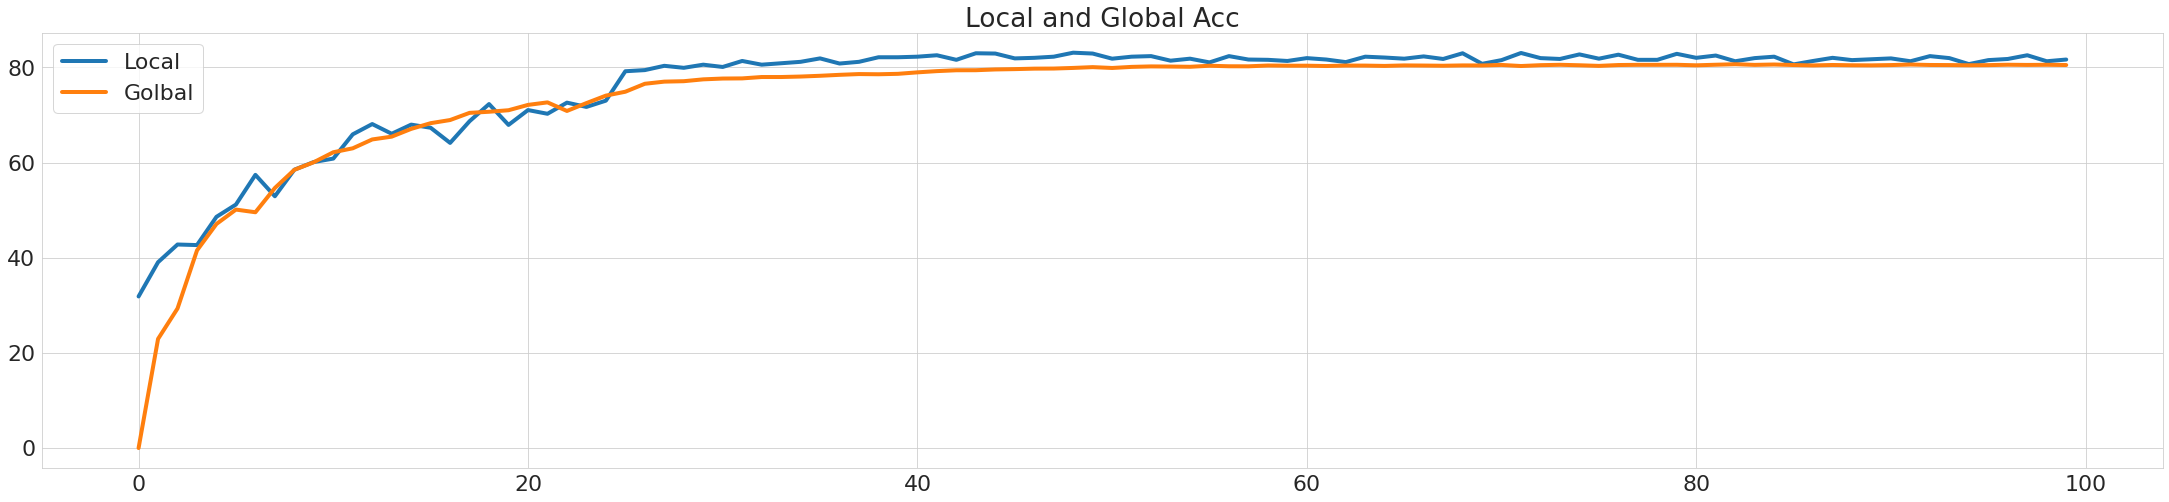

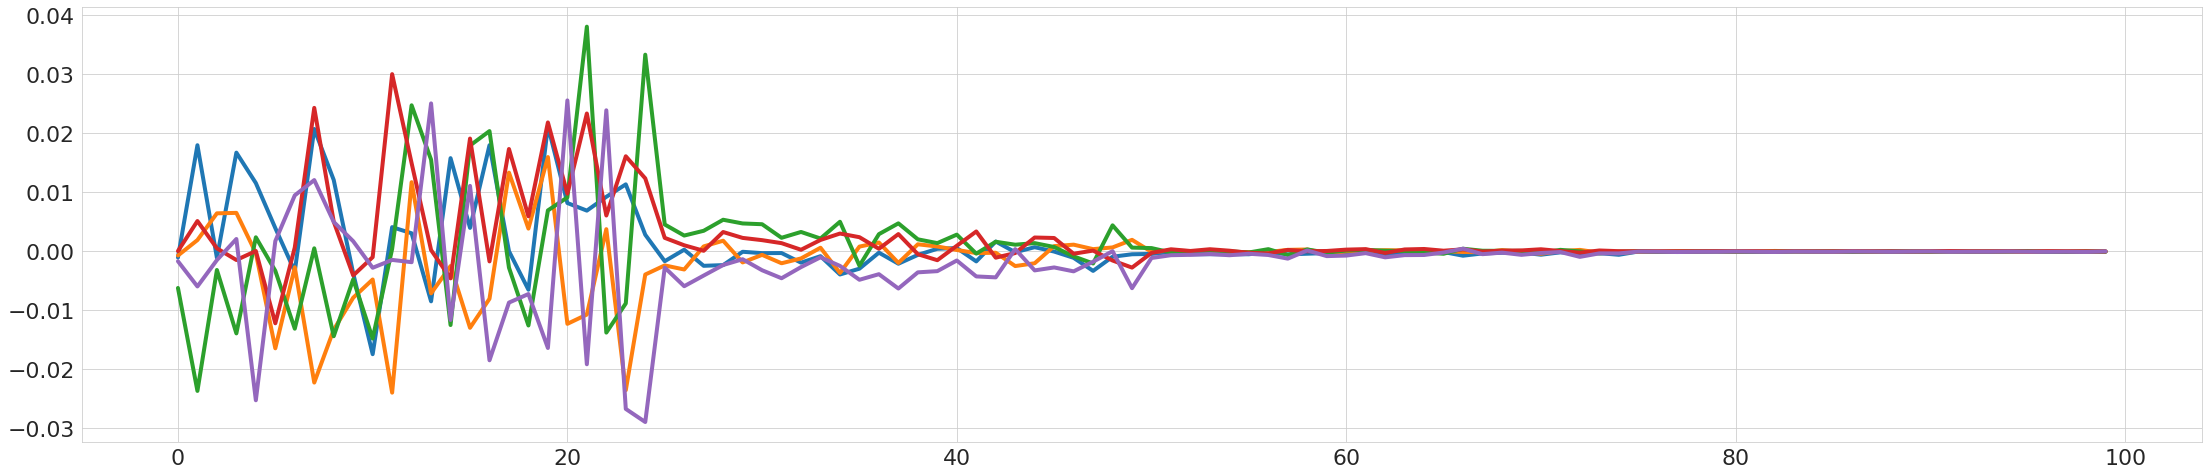

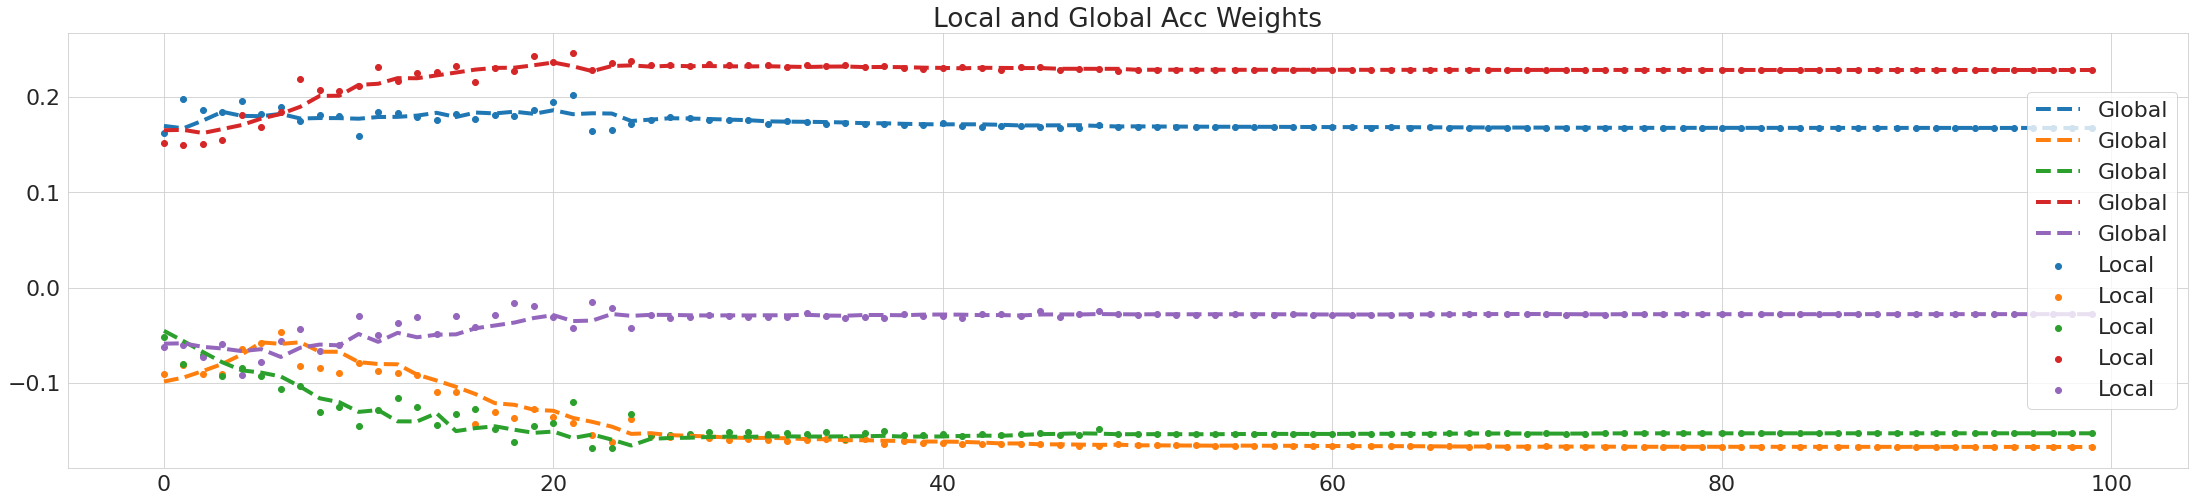

In [12]:
plt.figure(figsize=(38,8))
plt.plot(round_id_list, local_acc_list, label='Local')
plt.plot(round_id_list, global_acc_list, label='Golbal')
plt.legend()
plt.title('Local and Global Acc')

plt.figure(figsize=(38,8))
for j in range(5):
    e,f,g,h = int(j),int(randint(0,2)),int(randint(0,2)),int(randint(0,2))
    plt.plot(round_id_list, 
             [i['model.0.0.weight'][e,f,g,h].item() for i in change_list], 
             )
    
plt.figure(figsize=(38,8))
for j in range(5):
    e,f,g,h = int(j),int(randint(0,2)),int(randint(0,2)),int(randint(0,2))
    print
    p = plt.plot(round_id_list, 
             [i['model.0.0.weight'][e,f,g,h].item() for i in global_list], '--',
             label='Global')
    plt.scatter(round_id_list, 
             [i['model.0.0.weight'][e,f,g,h].item() for i in local_list], color=p[-1].get_color(),
             label='Local')
    plt.legend()
    plt.title('Local and Global Acc Weights')

In [13]:
round_id_list = sorted([int(i[:2]) for i in id_to_file.keys() if '---00' in i])
print(round_id_list)
change_list = []


for i in round_id_list:
    change_list.append(diff_state_dict(old=id_to_file[f'G-{i-1:02}']['net'],
                                       new=id_to_file[f'{i:02}---00']['net'],
                                       keys=id_to_file[f'G-{i-1:02}']['net'].keys()))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


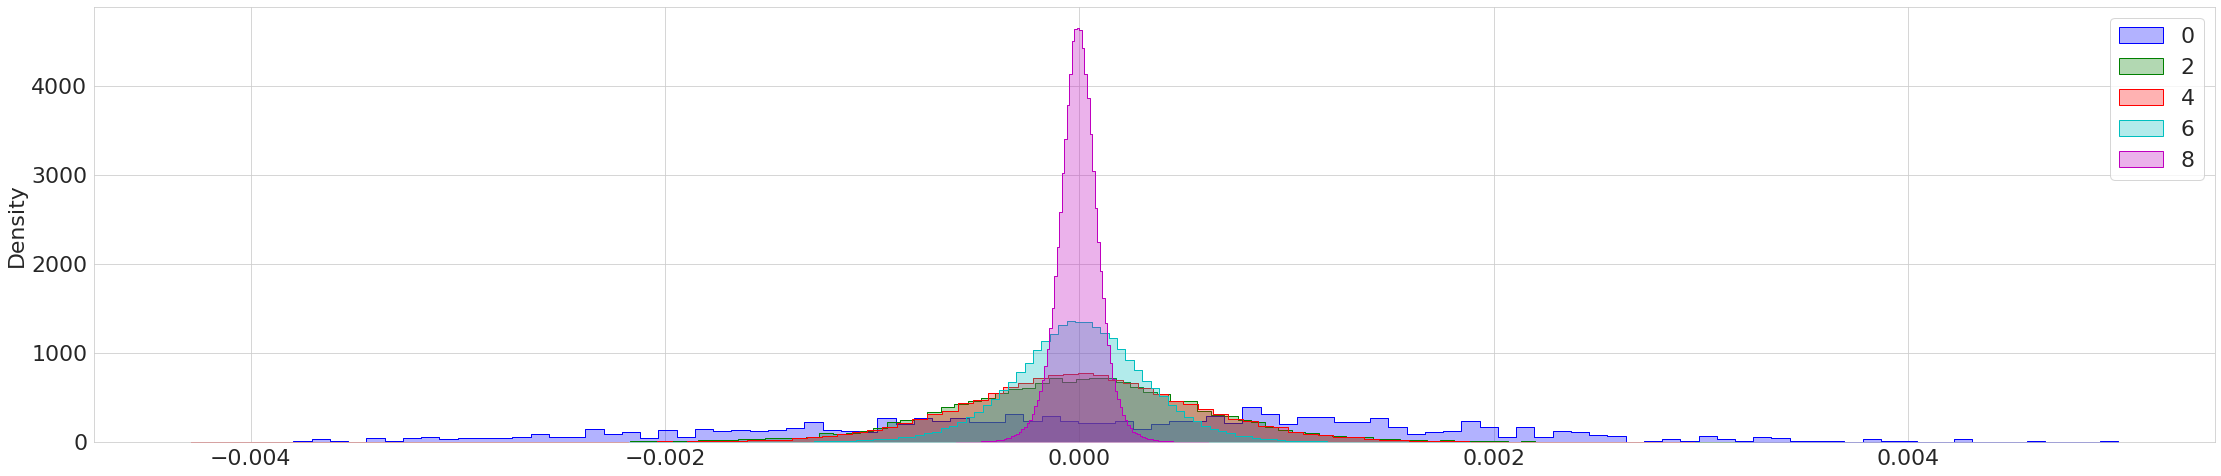

In [32]:
plt.figure(figsize=(38,8))

sns.histplot(change_list[30]['model.0.0.weight'].numpy().flatten(), stat='density', bins=100, color='b', alpha=0.3, label='0', element='step')
sns.histplot(change_list[30]['model.2.0.weight'].numpy().flatten(), stat='density', bins=100, color='g', alpha=0.3, label='2', element='step')
sns.histplot(change_list[30]['model.4.0.weight'].numpy().flatten(), stat='density', bins=100, color='r', alpha=0.3, label='4', element='step')
sns.histplot(change_list[30]['model.6.0.weight'].numpy().flatten(), stat='density', bins=100, color='c', alpha=0.3, label='6', element='step')
sns.histplot(change_list[30]['model.8.0.weight'].numpy().flatten(), stat='density', bins=100, color='m', alpha=0.3, label='8', element='step')
plt.legend()

In [7]:
global_start = []
global_end   = []

devices = []
devices_change = []

for j in range(30): # loop on device
    d = []
    d_change = []
    for i in range(40): # loop on round
        d.append(id_to_file[f'{i:02}---{j:02}']['net'])
        d_change.append(diff_state_dict(old=id_to_file[f'G-{i-1:02}']['net'],
                                       new=id_to_file[f'{i:02}---{j:02}']['net'],
                                       keys=id_to_file[f'G-{i-1:02}']['net'].keys()))
    devices.append(deepcopy(d))
    devices_change.append(deepcopy(d_change))
    
for i in range(40):
    global_start.append(id_to_file[f'G-{i-1:02}']['net'])
    global_end.append(id_to_file[f'G-{i:02}']['net'])

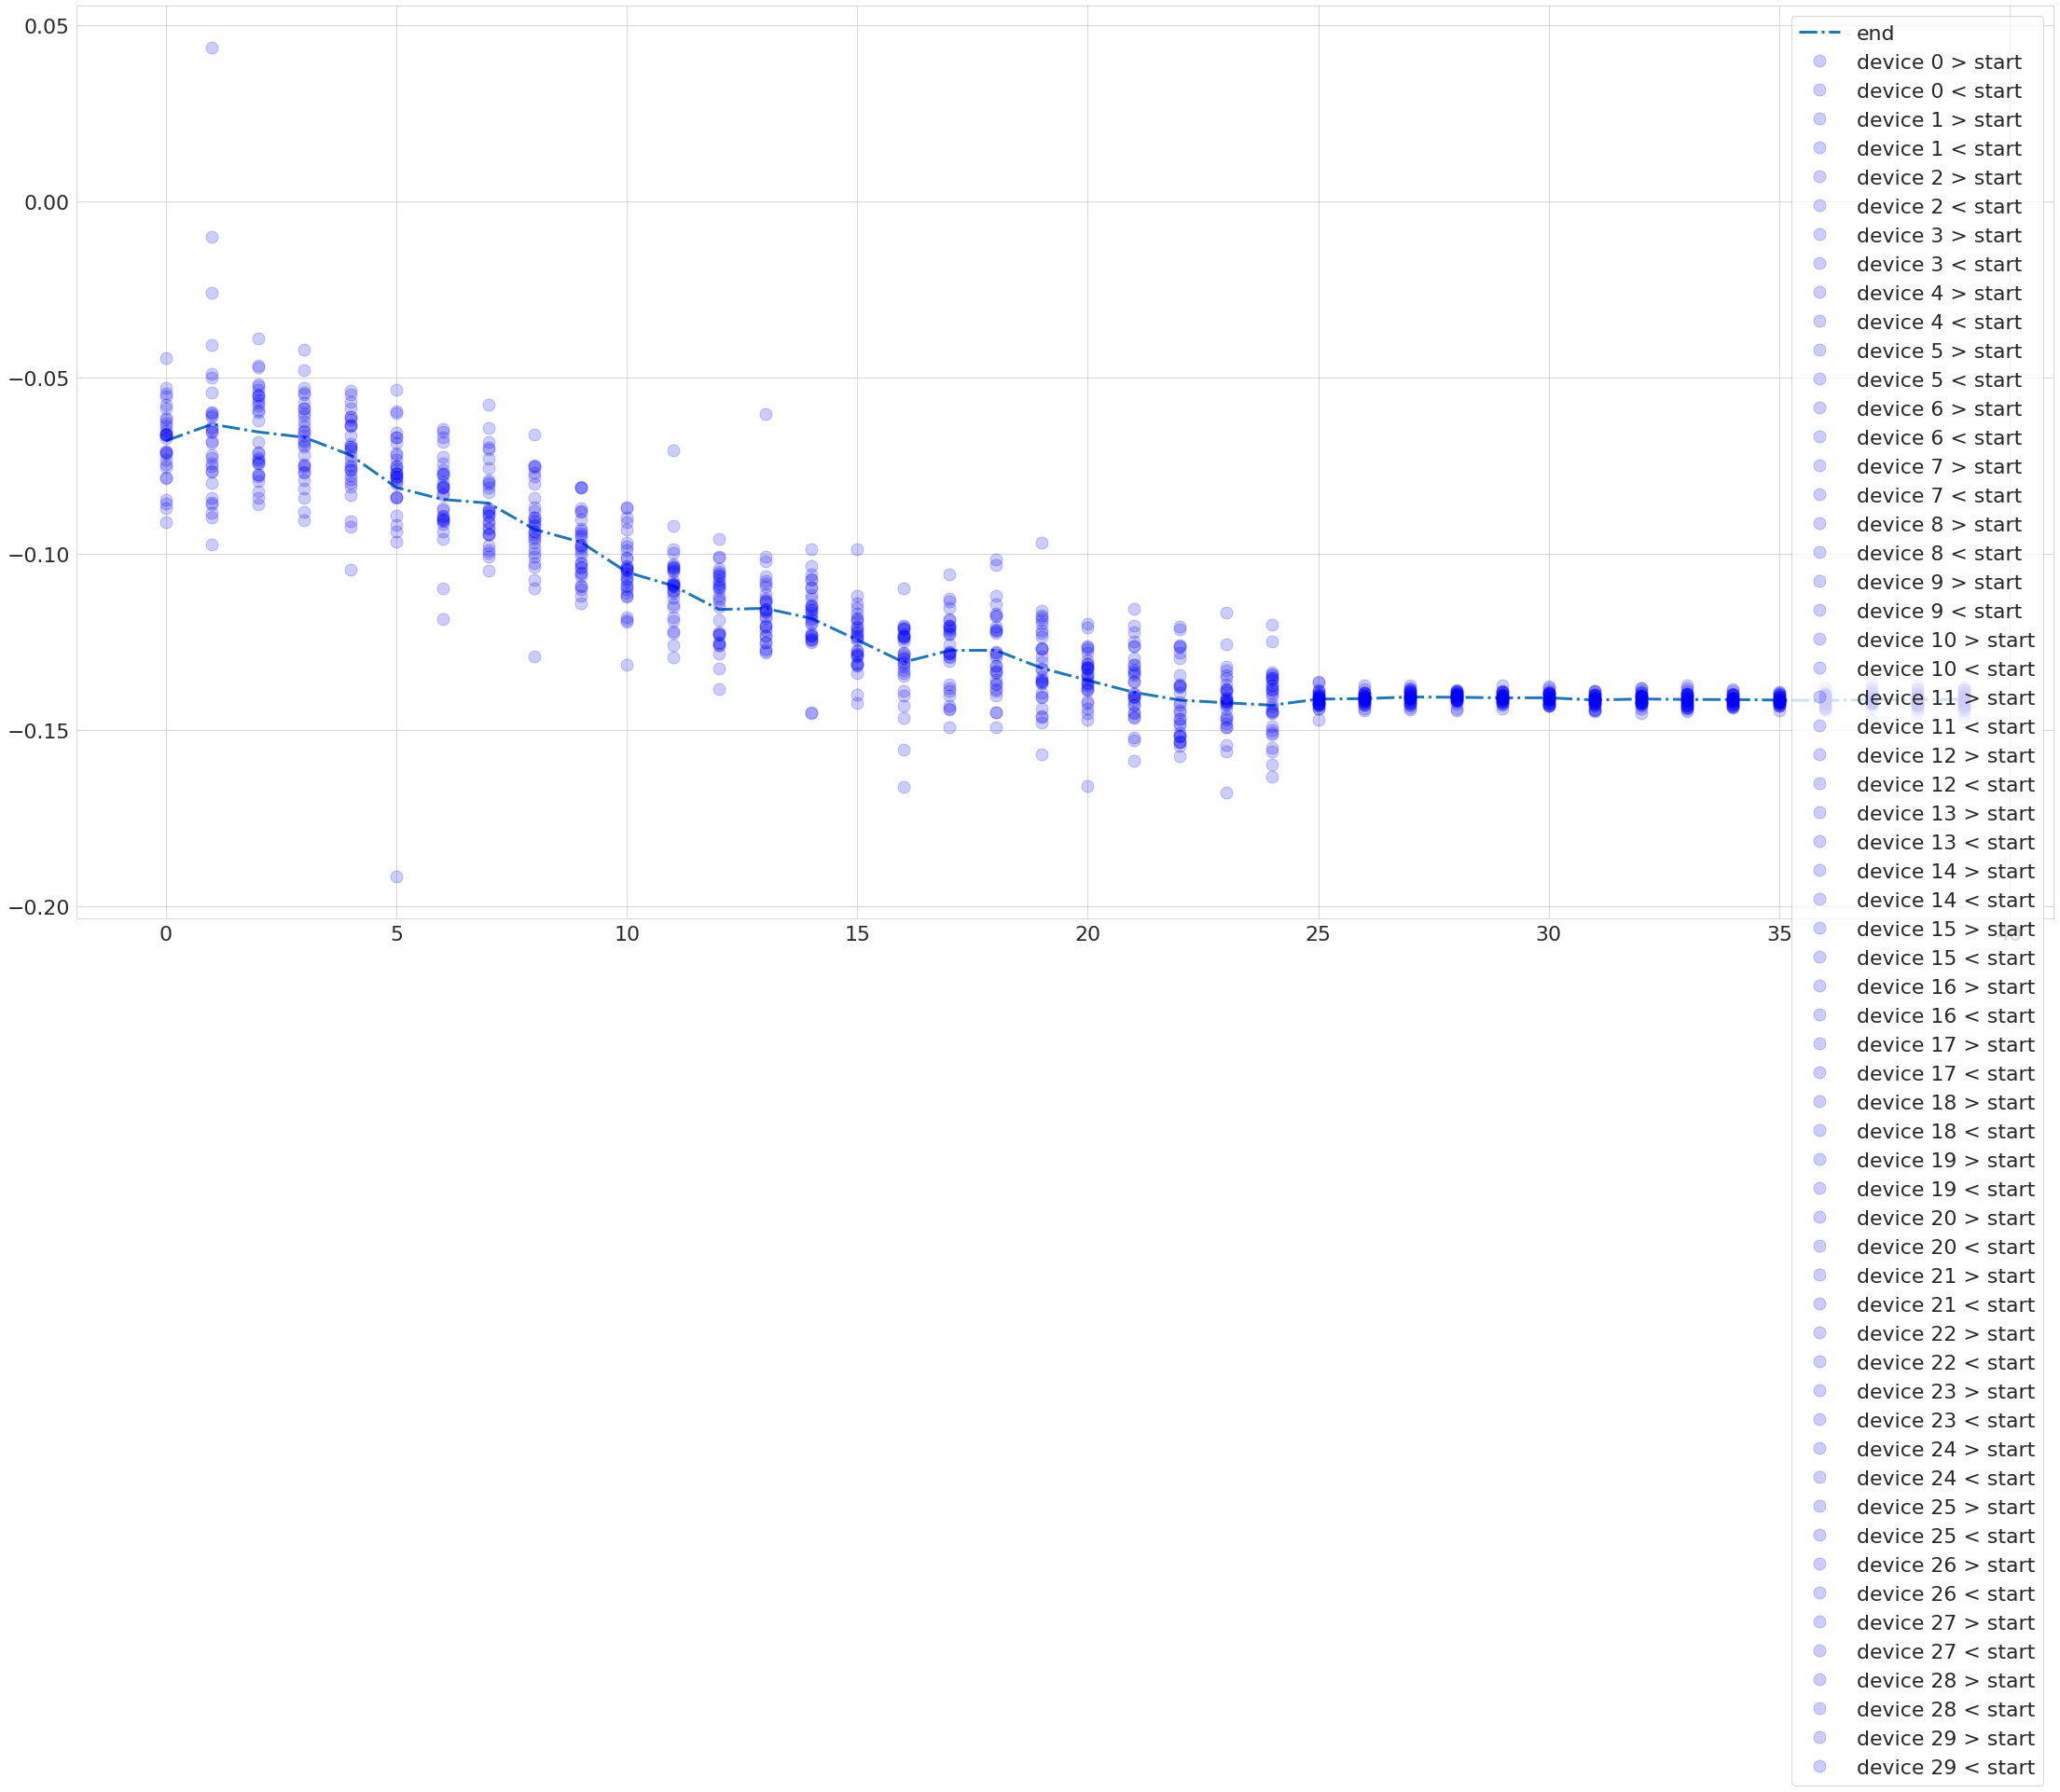

In [17]:
plt.figure(figsize=(38,18))

wei_name = 'model.0.0.weight'
e,d,f,j = 15,2,2,1

g_s = [i[wei_name][e,d,f,j].item() for i in global_start]
g_e = [i[wei_name][e,d,f,j].item() for i in global_end]

plt.plot(range(40), g_e, '-.', label='end', linewidth=3)
# plt.plot(range(40), g_e, '--', label='end', linewidth=3)

for de_idx in range(30):
    de_color = 'b'
    de_marker = 'o'
    de = np.array([i[wei_name][e,d,f,j].item() for i in devices[de_idx]])
    great = [i>j for i,j in zip(de, g_s)]
    less =  [i<j for i,j in zip(de, g_s)]
    plt.plot(np.arange(40)[great], de[great], marker=de_marker, linestyle='none', color=de_color, label='device %d > start'%de_idx, alpha=0.2)
    plt.plot(np.arange(40)[less], de[less], marker=de_marker, linestyle='none', color=de_color, label='device %d < start'%de_idx, alpha=0.2)

# de_idx = 1
# de_color = 'r'
# de_marker = '^'
# de = np.array([i[wei_name][e,d,f,j].item() for i in devices[de_idx]])
# great = [i>j for i,j in zip(de, g_s)]
# less =  [i<j for i,j in zip(de, g_s)]
# plt.plot(np.arange(40)[great], de[great], marker=de_marker, linestyle='none', color=de_color, label='device %d > start'%de_idx)
# plt.plot(np.arange(40)[less], de[less], marker=de_marker, fillstyle='bottom', linestyle='none', color=de_color, label='device %d < start'%de_idx)

# de_idx = 20
# de_color = 'g'
# de_marker = 's'
# de = np.array([i[wei_name][e,d,f,j].item() for i in devices[de_idx]])
# great = [i>j for i,j in zip(de, g_s)]
# less =  [i<j for i,j in zip(de, g_s)]
# plt.plot(np.arange(40)[great], de[great], marker=de_marker, linestyle='none', color=de_color, label='device %d > start'%de_idx)
# plt.plot(np.arange(40)[less], de[less], marker=de_marker, fillstyle='bottom', linestyle='none', color=de_color, label='device %d < start'%de_idx)

# de_idx = 10
# de_color = 'c'
# de_marker = 'X'
# de = np.array([i[wei_name][e,d,f,j].item() for i in devices[de_idx]])
# great = [i>j for i,j in zip(de, g_s)]
# less =  [i<j for i,j in zip(de, g_s)]
# plt.plot(np.arange(40)[great], de[great], marker=de_marker, linestyle='none', color=de_color, label='device %d > start'%de_idx)
# plt.plot(np.arange(40)[less], de[less], marker=de_marker, fillstyle='bottom', linestyle='none', color=de_color, label='device %d < start'%de_idx)

# de_idx = 15
# de_color = 'm'
# de_marker = 'p'
# de = np.array([i[wei_name][e,d,f,j].item() for i in devices[de_idx]])
# great = [i>j for i,j in zip(de, g_s)]
# less =  [i<j for i,j in zip(de, g_s)]
# plt.plot(np.arange(40)[great], de[great], marker=de_marker, linestyle='none', color=de_color, label='device %d > start'%de_idx)
# plt.plot(np.arange(40)[less], de[less], marker=de_marker, fillstyle='bottom', linestyle='none', color=de_color, label='device %d < start'%de_idx)

# de_idx = 16
# de_color = 'y'
# de_marker = 'D'
# de = np.array([i[wei_name][e,d,f,j].item() for i in devices[de_idx]])
# great = [i>j for i,j in zip(de, g_s)]
# less =  [i<j for i,j in zip(de, g_s)]
# plt.plot(np.arange(40)[great], de[great], marker=de_marker, linestyle='none', color=de_color, label='device %d > start'%de_idx)
# plt.plot(np.arange(40)[less], de[less], marker=de_marker, fillstyle='bottom', linestyle='none', color=de_color, label='device %d < start'%de_idx)

plt.legend()

## Input Images

Files already downloaded and verified


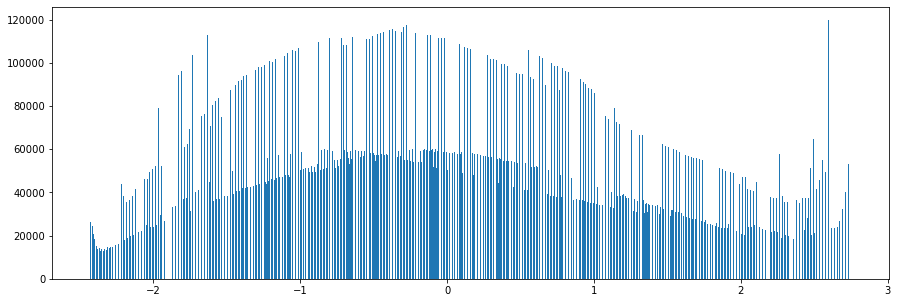

In [7]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

transform_test = transforms.Compose([                                           
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
testset = torchvision.datasets.CIFAR10(root='/tmp', train=False,
                                       download=True,
                                       transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False,
                                         num_workers=2)

for d, l in testloader:
    t = d.flatten().numpy()
    plt.figure(figsize=[15,5])
    plt.hist(t, bins=1000)

In [10]:
a = torch.tensor([1,2,3])
a.ge(1).all().item()

True